In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline
     

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-08 11:37:57--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-08 11:37:57 (37.0 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
PATH = "./data.csv"
select_cols = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", 
               "highway MPG", "city mpg", "MSRP"]
data = pd.read_csv(PATH, usecols=select_cols)

In [4]:
print(data.shape)

(11914, 10)


In [5]:
data.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200


In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

string_columns = list(data.dtypes[data.dtypes == 'object'].index)

for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [8]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [9]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
data["engine_hp"].fillna(0, inplace=True)      
data["engine_cylinders"].fillna(0, inplace=True) 

In [11]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [12]:
data.rename(columns={'msrp': 'price'}, inplace=True)

In [13]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [14]:
data_class = data.copy()
mean = data_class['price'].mean()

#data_class['above_average'] = np.where(data_class['price'] > mean, 1, 0)
# Replace the 'price' column values with 'above_average' values
data['above_average'] = data['price'].map(lambda x: 1 if x > mean else 0)

In [15]:
data.head(10)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
5,bmw,1_series,2012,230.0,6.0,manual,coupe,28,18,31200,0
6,bmw,1_series,2012,300.0,6.0,manual,convertible,26,17,44100,1
7,bmw,1_series,2012,300.0,6.0,manual,coupe,28,20,39300,0
8,bmw,1_series,2012,230.0,6.0,manual,convertible,28,18,36900,0
9,bmw,1_series,2013,230.0,6.0,manual,convertible,27,18,37200,0


In [16]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

In [19]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [20]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
above_average          int64
dtype: object

In [21]:
numerical = ["year","engine_hp","engine_cylinders","highway_mpg","city_mpg"]
categorical = ["make","model","transmission_type","vehicle_style"]

Question1# Which numerical variable (among the following 4) has the highest AUC?

In [22]:

#@ CALCULATING ROC AUC SCORE:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))
     

     year, 0.688
engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


In [23]:
columns = categorical + numerical

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

Question 2: What's the AUC of this model on the validation dataset? (round to 3 digits)

In [24]:
#@ INSPECTING ROC AUC SCORE:
roc_auc_score(y_val, y_pred)

0.9803867466832218

In [25]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores



df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,644,327,10,1402
20,0.2,625,203,29,1526
30,0.3,609,147,45,1582
40,0.4,593,90,61,1639
50,0.5,579,69,75,1660
60,0.6,554,46,100,1683
70,0.7,507,26,147,1703
80,0.8,457,14,197,1715
90,0.9,366,3,288,1726


In [26]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

Question3: At which threshold precision and recall curves intersect?

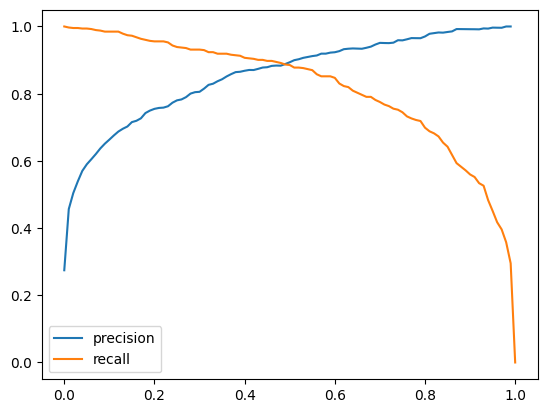

In [27]:
#@ INSPECTING THE CURVES:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

In [28]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

Question 4 : At which threshold F1 is maximal?

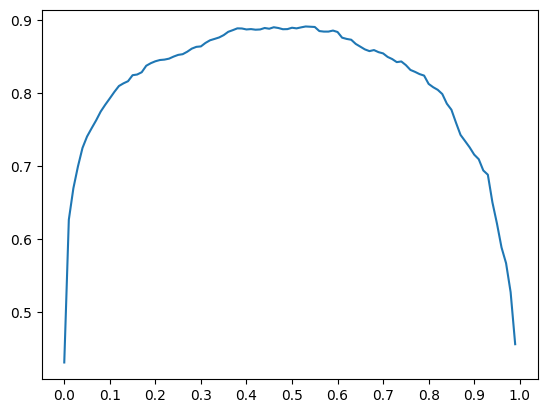

In [29]:
#@ INSPECTING F1 SCORE:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [30]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
     

Question 5: How large is standard devidation of the scores across different folds?

In [31]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average
    y_val = df_val.above_average

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.980 +- 0.003


In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.001
C= 0.5, 0.979 +- 0.002
C=  10, 0.983 +- 0.003
